In [2]:
from __future__ import annotations

from importlib.metadata import version
from typing import Iterable

import matplotlib.pyplot as plt
import numpy as np
#from assets.models import upper_glycolysis, phase_plane_model
#from assets.utils import print_as_table
from modelbase.ode import DerivedStoichiometry, Model, Simulator, mca
from scipy.integrate import solve_ivp

for pkg in ("modelbase",):
    print(f"{pkg:<10} {version(pkg)}")


def kelvin_from_celsius(t: float) -> float:
    return t + 273.15

modelbase  1.30.0


In [4]:
# define rate functions
def constant(k: float) -> float:
    return k


def proportional(k: float, s: float) -> float:
    return k * s

In [5]:
def linear_chain_2cpds() -> Model: # definition in a function highly recommended, as it avoids problems of hidden state.
    m = Model()
    m.add_compounds(["S", "P"])
    m.add_parameters({"k_in": 1, "k_1": 1, "k_out": 1})
    m.add_reaction_from_args(
        rate_name="v0",
        function=constant,
        stoichiometry={"S": 1},
        args=["k_in"],
    )
    m.add_reaction_from_args(
        rate_name="v1", 
        function=proportional,
        stoichiometry={"S": -1, "P": 1},
        args=["k_1", "S"],
    )
    m.add_reaction_from_args(
        rate_name="v2",
        function=proportional,
        stoichiometry={"P": -1},
        args=["k_out", "P"],
    )
    return m

#older functions that can build the stoichiometric matrix:
#Model.add_reaction
#Model.add_reaction_from_ratelaw
#Model.add_rate
#Model.add_rates
#Model.add_stoichiometry
#Model.add_stoichiometry_by_compound
#Model.add_stoichiometries
#Model.add_stoichiometries_by_compounds

In [19]:
Y.shape

(150, 2)

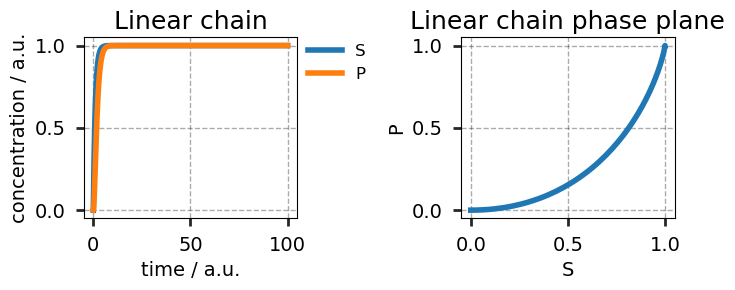

In [25]:
s = Simulator(linear_chain_2cpds())
s.initialise({"S": 0, "P": 0})
s.simulate(t_end = 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
s.plot(
    xlabel="time / a.u.",
    ylabel="concentration / a.u.",
    title="Linear chain",
    ax=ax1,
)
s.plot_phase_plane(
    cpd1="S",
    cpd2="P",
    title="Linear chain phase plane",
    ax=ax2,
)
plt.show()

In [28]:
print([i for i in dir(s) if i.startswith("plot")])

['plot', 'plot_3d_trajectories', 'plot_against_variable', 'plot_all', 'plot_all_against_variable', 'plot_derived', 'plot_derived_against_variable', 'plot_flux_selection', 'plot_flux_selection_against_variable', 'plot_fluxes', 'plot_fluxes_against_variable', 'plot_fluxes_grid', 'plot_grid', 'plot_log', 'plot_phase_plane', 'plot_phase_space', 'plot_selection', 'plot_selection_against_variable', 'plot_semilog', 'plot_trajectories']


In [31]:
s.get_fluxes_df()
s.get_results_df()
# ... and so on

,S,P
0.000000e+00,0.000000e+00,0.000000e+00
6.103516e-10,6.103516e-10,3.725290e-19
6.104126e-06,6.104089e-06,3.725617e-11
6.713928e-05,6.713639e-05,2.893112e-09
1.281744e-04,1.281654e-04,9.059758e-09
...,...,...
5.407879e+01,1.000000e+00,1.000000e+00
6.143392e+01,1.000000e+00,1.000000e+00
6.878904e+01,1.000000e+00,1.000000e+00
8.539692e+01,1.000000e+00,1.000000e+00


In [35]:
s.initialise({"S": 0, "P": 0})

t_ss, y_ss = s.simulate_to_steady_state()

print(t_ss, y_ss)

[1000.] [[1. 1.]]
